Group Members: Juniper Ferlan, Thomas Curry, Andre Hu

# The best is the most boring
If things of boring, then nothing bad is happeing. Thus the most boring neiborhood is the best one. 
We each selected a metric of what it means to be boring, and chose the neiborhood with the greatest overlap. 

In [21]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

# Playgrounds by Thomas Curry
<img src="images/Catalono_Playground.jpg" width="340"> <img src="images/Chadwick_Playground.jpg" width="350">


Something fun for a neiborhood to have is a Playground. I remember when I was a kid going out with my siblings and playing at my local playground. We all remember recess, playing at the school playground. Playgrounds are fun, so the lack of them must be boring. 

In [23]:
playgrounds = pd.read_csv("playgrounds.csv")
playgrounds.head(10)

,_id,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1,2,1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
2,3,1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
3,4,1770671485,Alton Playground,NaN,Parks - Western,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003191600,5,19,6,4-28,40.414137,-80.021605
4,5,18942817,Ammon Playground,NaN,Parks - Schenley,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064
5,6,230731204,Arlington Playground,NaN,Parks - Southern,Arlington Park,FERNLEAF ST,https://tools.wprdc.org/images/pittsburgh/play...,South Side Slopes,3,16,42003160800,3,16,3,4-22,40.418094,-79.975429
6,7,420573029,Armstrong Playground,NaN,Parks - Southern,Armstrong Park,S 12TH ST,https://tools.wprdc.org/images/pittsburgh/play...,South Side Flats,3,17,42003170200,3,17,3,4-24,40.428165,-79.986121
7,8,113170092,Arsenal Playground,NaN,Parks - Northeast,Arsenal Park,40TH ST,https://tools.wprdc.org/images/pittsburgh/play...,Lower Lawrenceville,7,6,42003060300,2,6,2,3-3,40.466721,-79.961520
8,9,2089697067,August WIlson Playground,NaN,Parks - Schenley,August Wilson Park,CLIFF ST,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.446510,-79.985968
9,10,2124405123,Banksville Playground,NaN,Parks - Western,Banksville Park,CRANE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Banksville,2,20,42003202300,5,20,6,4-9,40.414666,-80.039342


Using a [data set from 2021](https://data.wprdc.org/dataset/playgrounds) that noting all playgrounds at that time, I am able to count how many Playgrounds are in each neighborhood. Since not all nieborhoods have 

In [24]:
counts = playgrounds["neighborhood"].value_counts()
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") 
count_map = neighborhoods.merge(counts,  how='left', left_on='hood', right_on='neighborhood')
count_map.fillna({"count":0}, inplace=True)

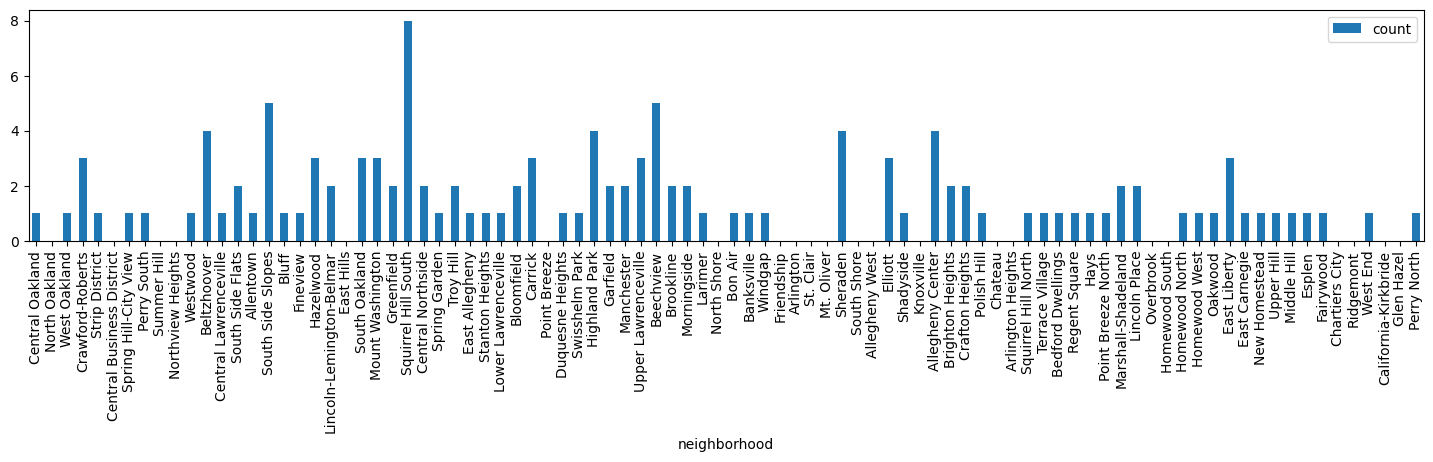

In [4]:
count_map.plot(x='hood', y ='count', kind='bar', figsize= (18,3), xlabel = "neighborhood")
plt.show()

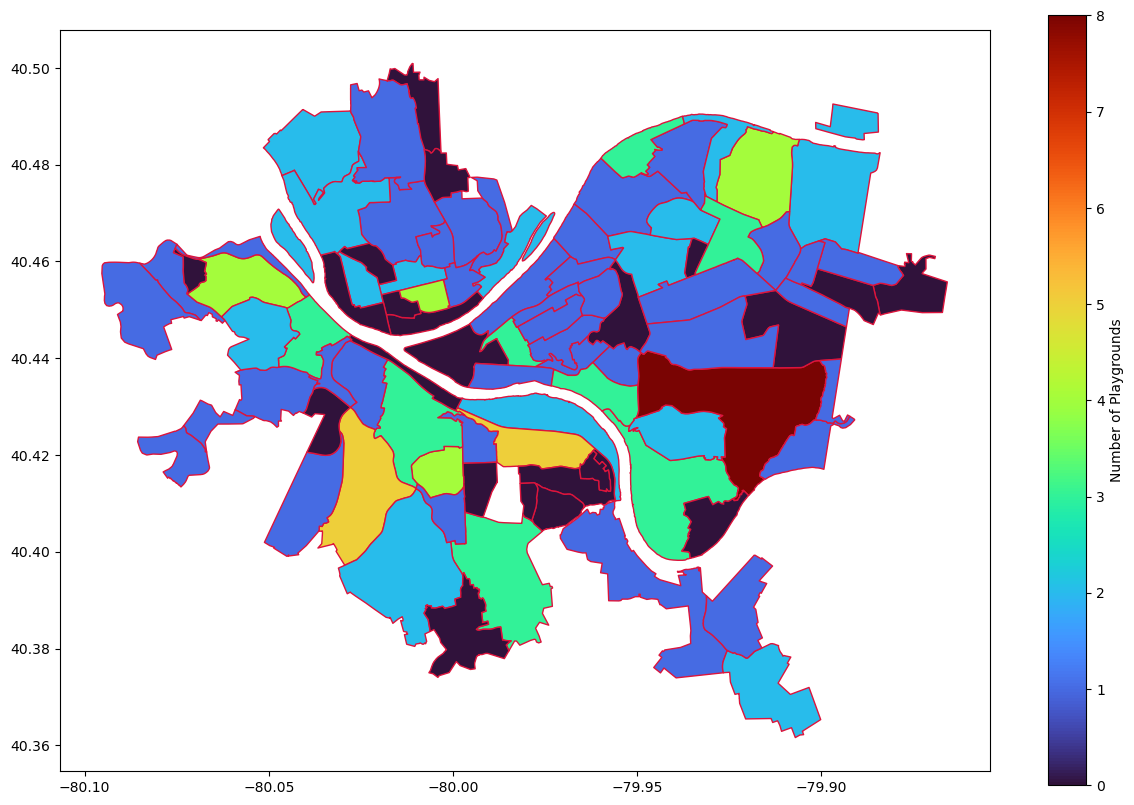

In [37]:
count_map.plot(column='count',
               cmap='turbo',              # choose a color palette
               edgecolor="crimson",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Playgrounds"}, # label the legend
               figsize=(15, 10),         # set the size
               )
plt.show()

Looking at this chart, we can see that the nieborhood with most playgrounds is Squirrel Hill south, but there are many with no Playgrounds. 

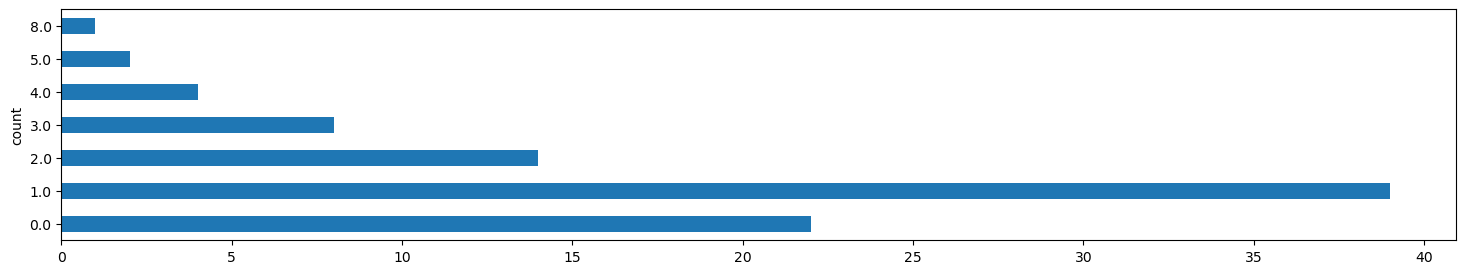

count
0.0    22
1.0    39
2.0    14
3.0     8
4.0     4
5.0     2
8.0     1
Name: count, dtype: int64

In [38]:
count_map["count"].value_counts().sort_index().plot(kind='barh', figsize= (18,3))
plt.show()
count_map["count"].value_counts().sort_index()

Looking at the data, there are 22 neiborhoods without playgrounds, thus using this data the number of viable canadates for most boring nieborhood can be narrowed down.

The narrowed list of those neighborhoods is below:

In [39]:
borings = count_map[count_map["count"] <= 0]
borings["hood"]

1                 North Oakland
5     Central Business District
8                   Summer Hill
9             Northview Heights
20                   East Hills
33                 Point Breeze
44                  North Shore
48                   Friendship
49                    Arlington
50                    St. Clair
51                   Mt. Oliver
53                  South Shore
54               Allegheny West
57                    Knoxville
62                      Chateau
63            Arlington Heights
72                    Overbrook
73               Homewood South
84               Chartiers City
85                    Ridgemont
87         California-Kirkbride
88                   Glen Hazel
Name: hood, dtype: object

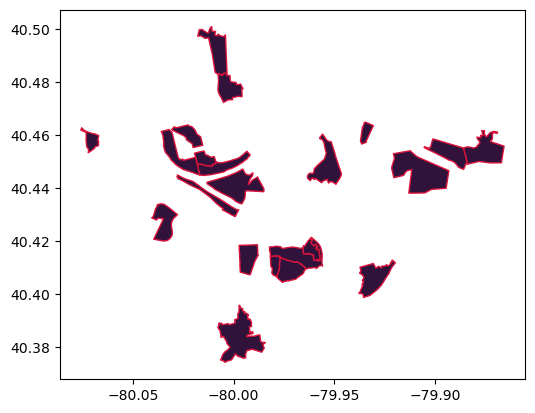

In [40]:
borings.plot(column='count',
               cmap='turbo',              # choose a color palette
               edgecolor="crimson",        # outline the districts in white
               legend=False,              # show the legend
               )
plt.show()

# Noise - Juniper Ferlan #
Naturally, the most boring neighborhood in the city would be one where the residents and even visitors are quiet at all times. Whether they are always asleep or the neighborhood is just mostly deserted, a neighborhood that's quiet is a neighborhood that's bland. When nothing is going on, residents can feel secure knowing they're not missing out on anything important at all!

### So, how do we measure quietness? ###
With noise complaints! Since the non-emergency police phone line 311 takes all noise complaints, I found the [311 Data](https://data.wprdc.org/dataset/311-data) dataset.

In [41]:
# Read .csv of all up-to-date 311 calls
data = pd.read_csv("https://data.wprdc.org/datastore/dump/29462525-62a6-45bf-9b5e-ad2e1c06348d")

data.head()

,_id,group_id,num_requests,parent_closed,status_name,status_code,dept,request_type_name,request_type_id,create_date_et,...,cross_street_id,city,neighborhood,census_tract,council_district,ward,police_zone,latitude,longitude,geo_accuracy
0,1,827262,1,f,open,0,DPW - Administration,Park Shelter,543,2024-03-12T10:50:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
1,2,720661,1,f,open,0,DPW - Administration,Park Shelter,543,2023-03-20T07:52:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
2,3,722010,1,f,open,0,DPW - Administration,Park Shelter,543,2023-03-24T07:44:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
3,4,846915,1,f,open,0,Police - Zones 1-6,Illegal Parking,417,2024-05-19T12:24:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES
4,5,853708,1,f,open,0,DPW - Facilities,City Facility,375,2024-06-06T23:04:00,...,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES


As you can see, there are a LOT of different requests for which the non-emergency line is called and the calls do not always need to be made from a particular neighborhood. Let's only show the relevant ones, where noise complaints are made for a specific neighborhood.

In [42]:
# Create and use mask to only show 311 calls where "Noise" is mentioned
mask = data['request_type_name'].str.contains('Noise')
noise = data[mask]

# Drop all irrelevant columns and all rows where no neighborhood is logged
noise = noise[['request_type_name', 'neighborhood']]
noise.dropna(inplace = True, ignore_index = True)

noise.head()

,request_type_name,neighborhood
0,Excessive Noise/Disturbances,Central Business District
1,Excessive Noise/Disturbances,Highland Park
2,Noise,Central Northside
3,Excessive Noise/Disturbances,Highland Park
4,Excessive Noise/Disturbances,Bon Air


Much better! Now let's see how many noise complaints were made by each neighborhood and find the one(s) with the smallest amount.

In [43]:
noise2 = noise.groupby(['neighborhood']).size()
print(noise2.sort_values().head(10))

neighborhood
Glen Hazel           1
Hays                 1
Northview Heights    1
Ridgemont            1
Homewood West        2
New Homestead        2
Chartiers City       3
Arlington Heights    4
Bedford Dwellings    5
South Shore          5
dtype: int64


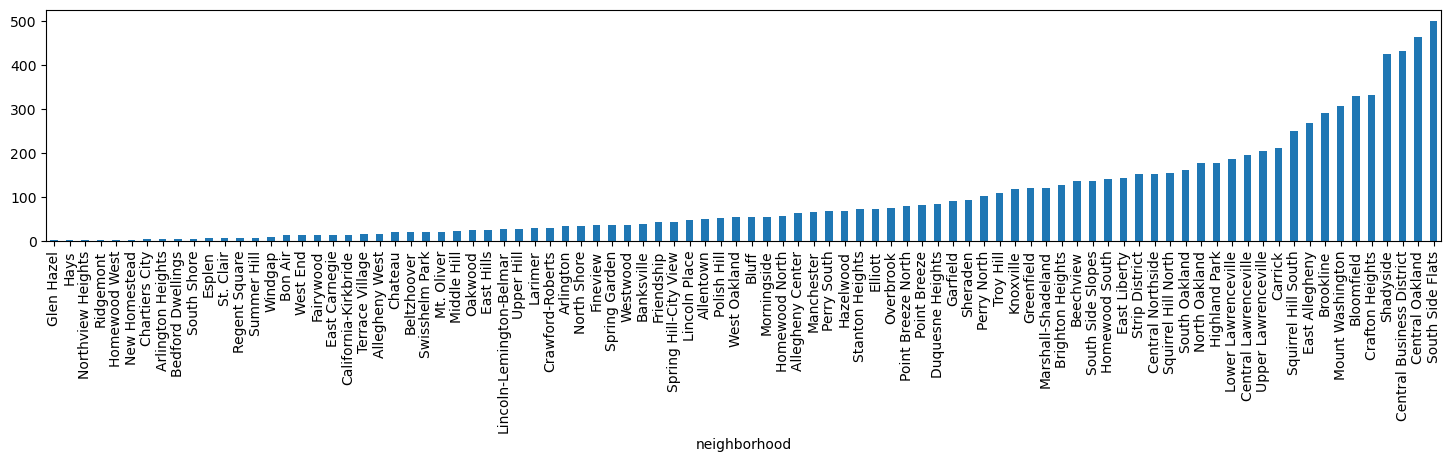

In [44]:
noise2.sort_values().plot(x='neighborhood', kind='bar', figsize=(18,3))
plt.show()

And there we go! As we can see, there's a handful of neighborhoods with noise complaint counts as low as one, those being Glen Hazel, Hays, Northview Heights, and Ridgemont. Since this dataset was gathered over the course of several years, that means that living in any of those neighborhoods means you are very unlikely to deal with unwanted noise. Think of how great you'll look after all the beauty sleep you'll get!

Looking at the Playgrounds and Noise Complaints data sets, there is overlap on the lower end. Below is a list of neighborhoods that have 0 Playgrounds and 1 Noise Complaint. 

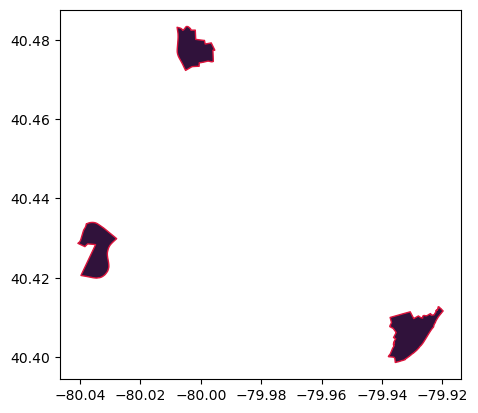

9     Northview Heights
85            Ridgemont
88           Glen Hazel
Name: hood, dtype: object

In [53]:
masknoise = []
for hoods in borings["hood"]:
    masknoise.append(noise2[hoods] == 1)
borings2 = borings[masknoise]
borings2.plot(column='count',
               cmap='turbo',              # choose a color palette
               edgecolor="crimson",        # outline the districts in white
               legend=False,              # show the legend
               )
plt.show()
borings2["hood"]

# Arrests Andre 
Normally with crimes are not boring at all. Though crime does not sounds good, but it is not 'boring'.
How to measure the amount of crimes? The [number of arrests.](https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f)

In [14]:
data = pd.read_csv("Arrests.csv")

data.head()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


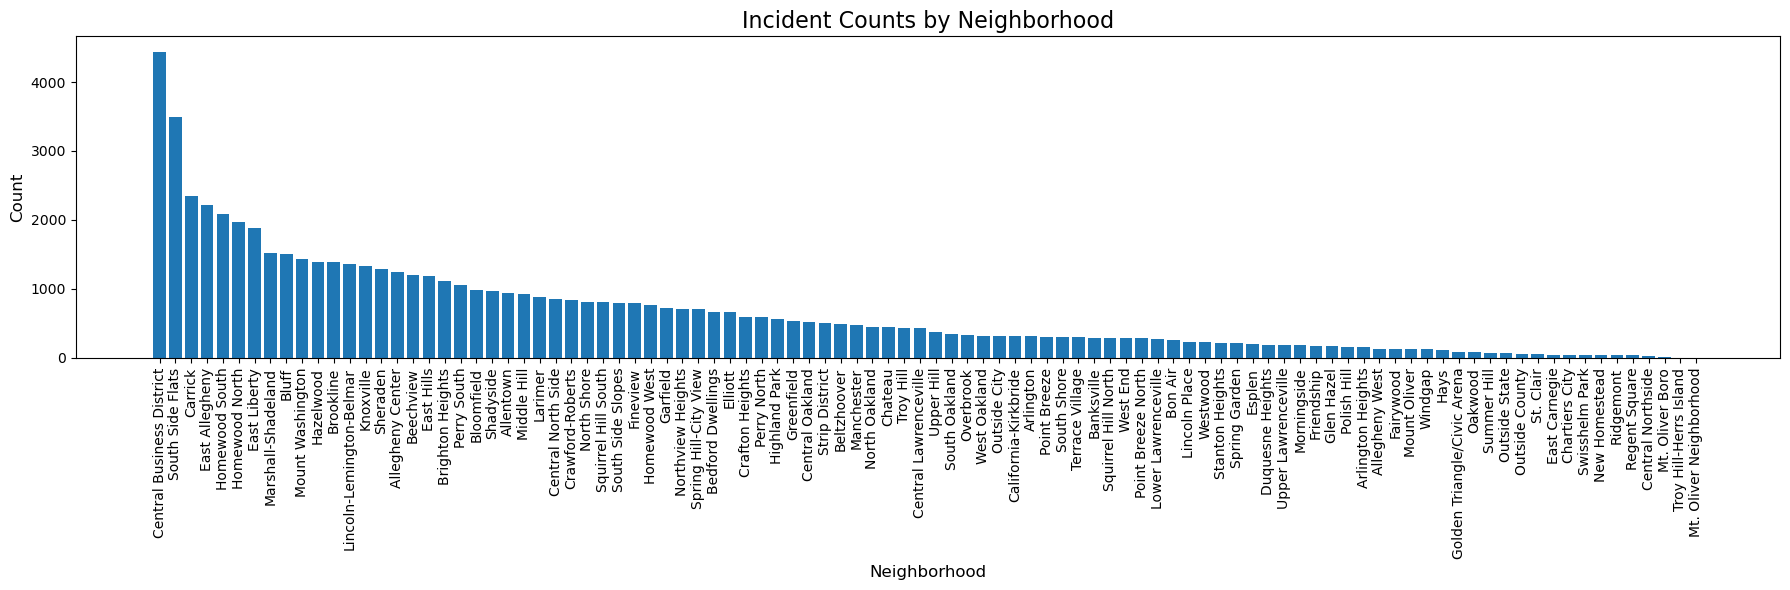

In [15]:
neighborhood_counts = data['INCIDENTNEIGHBORHOOD'].value_counts()
neighborhood_df = neighborhood_counts.reset_index()
neighborhood_df.columns = ['Neighborhood', 'Count']
plt.figure(figsize=(18, 6))
plt.bar(neighborhood_df['Neighborhood'], neighborhood_df['Count'])
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Incident Counts by Neighborhood', fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Top 10 Neiborhoods with least arrests
               Neighborhood  Count
97  Mt. Oliver Neighborhood      2
96   Troy Hill-Herrs Island      6
95          Mt. Oliver Boro     18
94        Central Northside     23
92                Ridgemont     37
93            Regent Square     37
91            New Homestead     39
90           Swisshelm Park     43
89           Chartiers City     46
88            East Carnegie     48


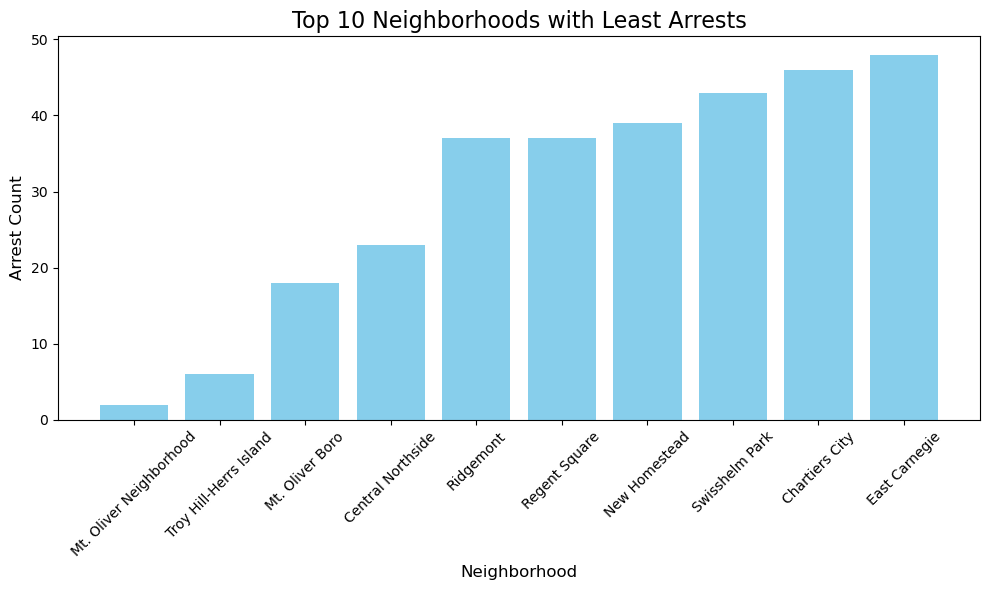

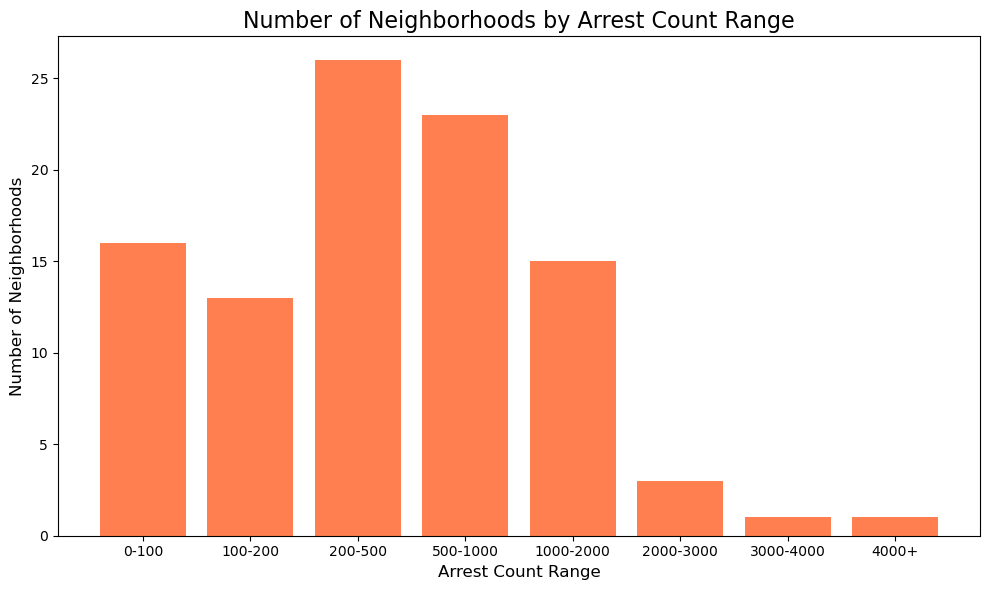

In [16]:
least_arrests = neighborhood_df.sort_values(by='Count').head(10)
print("Top 10 Neiborhoods with least arrests")
print(least_arrests)

plt.figure(figsize=(10, 6))
plt.bar(least_arrests['Neighborhood'], least_arrests['Count'], color='skyblue')
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Arrest Count', fontsize=12)
plt.title('Top 10 Neighborhoods with Least Arrests', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

bins = [0, 100, 200, 500, 1000, 2000, 3000, 4000, neighborhood_df['Count'].max()]
labels = ['0-100', '100-200', '200-500', '500-1000', '1000-2000', '2000-3000', '3000-4000', '4000+']

neighborhood_df['Range'] = pd.cut(neighborhood_df['Count'], bins=bins, labels=labels, include_lowest=True)

range_counts = neighborhood_df['Range'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(range_counts.index, range_counts.values, color='coral')
plt.xlabel('Arrest Count Range', fontsize=12)
plt.ylabel('Number of Neighborhoods', fontsize=12)
plt.title('Number of Neighborhoods by Arrest Count Range', fontsize=16)
plt.tight_layout()
plt.show()

# Best Nieghborhood
Comparing the top ten nieghborhoods with the the least arrests, with the list of Nieborhoods with 0 playgrounds and 1 noise complaint, there is only 1 nieghborhood in both. 

## Ridgemont

Ridgemont is the most boring nieborhood. 

## Conclusion Thomas
I am not from pittsburgh, but from I have to say, I am shocked that there is not that much overlap between the 10 least Noise Complaints and Arrests. Loocking only at the an extreme  isn't the best form of analysis, but it does get us to the most boring. The goal is acheived. 


## Conclusion Juniper Ferlan¶

## Conclusion Andre